In [48]:
import pandas
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import glob

#  San Francisco State University
##  Software Engineering Team Assessment and Prediction (SETAP) Project  Machine Learning Training Data File Version 0.7
 ====================================================================

#  Copyright 2000-2017 by San Francisco State University, Dragutin Petkovic, and Marc Sosnick-Perez.

#  CONTACT
  -------
##  Professor Dragutin Petkovic:  petkovic@sfsu.edu

#  LICENSE
 -------
  This data is released under the Creative Commons Attribution-
  NonCommercial 4.0 International license.  For more information,
  please see
  http://creativecommons.org/licenses/by-nc/4.0/legalcode.
  The research that has made this data possible has been funded in
  part by NSF grant NSF-TUES1140172.

  YOUR FEEDBACK IS WELCOME
  ------------------------
  We are interested in how this data is being used.  If you use it in
  a research project, we would like to know how you are using the
  data.  Please contact us at petkovic@sfsu.edu.


#  FILES INCLUDED IN DISTRIBUTION PACKAGE
  ==================================
  More data about the SETAP project, data collection, and description
  and use of machine learning to analyze the data can be found in the
  following paper:

  D. Petkovic, M. Sosnick-Perez, K. Okada, R. Todtenhoefer, S. Huang,
  N. Miglani, A. Vigil: "Using the Random Forest Classifier to Assess
  and Predict Student Learning of Software Engineering Teamwork".
  Frontiers in Education FIE 2016, Erie, PA, 2016


  See DATA DESCRIPTION below for more information about the data.  The
  README file (which you are reading) contains project information
  such as data collection techniques, data organization and field
  naming convention.  In addition to the README file, the archive
  contains a number of .csv files.  Each of these CSV files contains
  data aggregated by team from the project (see below), paired with
  that team's outcome for either the process or product component of
  the team's evaluation.  The files are named using the following
  convention:
  
                  setap[Process|Product]T[1-11].csv

  For example, the file setapProcessT5.csv contains the data for all
  teams for time interval 5, paired with the outcome data for the
  Process component of the team's evaluation.

  Detailed information about the exact format of the .csv file may be
  found in the csv files themselves.


#  DATA DESCRIPTION
  ====================================================================
  The following is a detailed description of the data contained in the
  accompanying files.

###  INTRODUCTION
 ------------

  The data contained in these files were collected over a period of
  several semesters from students engaged in software engineering
  classes at San Francisco State University (class sections of CSC
  640, CSC 648 and CSC 848).  All students consented to this data
  being shared for research purposes provided no uniquely identifiable
  information was contained in the distributed files.  The information
  was collected through various means, with emphasis being placed on
  the collection of objective, quantifiable information.  For more
  information on the data collection procedures, please see the paper
  referenced above.


###  PRIVACY
  -------
  The data contained in this file does not contain any information
  which may be individually traced to a particular student who
  participated in the study.

#  BRIEF DESCRIPTION OF DATA SOURCES AND DERIVATIONS
  -------------------------------------------------
  SAMs (Student Activity Measure) are collected for each student team
  member during their participation in a software engineering class.
  Student teams work together on a final class project, and comprise
  5-6 students.  Teams that are made up of students from only one
  school are labeled local teams.  Teams made up of students from more
  than one school are labeled global teams.  SAMs are collected from:
  weekly timecards, instructor observations, and software engineering
  tool usage logs.  SAMs are then aggregated by team and time interval
  (see next section) into TAMs (Team Activity Measure).  Outcomes are
  determined at the end of the semester through evaluation of student
  team work in two categories:  software engineering process (how well
  the team applied best software engineering practices), and software
  engineering product (the quality of the finished product the team
  produced).  Thus for each team, two outcomes are determined, process
  and product, respectively.  Outcomes are classified into two class
  grades, A or F.  A represents teams that are at or above
  expectations, F represents teams that are below expectations or need
  attention.  For more information, please see the paper referenced
  above.

  The SE process and SE product outcomes represent ML training classes#  and are to be considered separately, e.g. one should train ML for SE
  process separately from training for SE product.



In [112]:
path ='data/SETAP PRODUCT DATA' 
allFiles = glob.glob(path + "/*.csv")
frame = pandas.DataFrame()
list_ = []
for file_ in allFiles:
    df = pandas.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pandas.concat(list_)

data = pandas.DataFrame.from_csv("data/SETAP PRODUCT DATA/setapProductT1.csv")
# full_data=True will let explore the whole dataset (T1-T11)
full_data = True
if (full_data):
    data = frame

In [113]:
labels = data['productLetterGrade']
features = data.drop('productLetterGrade', axis=1)
#Drop certain features
if (full_data):
    features = features.drop([col for col in features.columns if 'Total' in col], axis=1)
    features = features.drop([col for col in features.columns if 'Count' in col], axis=1)
    features = features.drop([col for col in features.columns if 'Student' in col], axis=1)
    #features = features.drop('femaleTeamMembersPercent', axis=1)

In [114]:
# Rename strings in data to appropriate integers, labels to booleans
mapping = {'F': False, 'A': True}
features_mapping = {'M': 0, 'F' : 1, 'Global': 0, 'Local': 1}
features = pandas.DataFrame(features)
labels = pandas.DataFrame(labels)
labels = labels.applymap(lambda s: mapping.get(s) if s in mapping else s)
#features.dropna(axis='columns', how='any', inplace=True)
features.fillna(1, inplace=True)
features = features.applymap(lambda s: features_mapping.get(s) if s in features_mapping else s)
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=1, train_size=0.4)

/Users/nickstepanov/miniconda3/envs/RoboND/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [119]:
rfc = RandomForestClassifier(n_estimators= 1000, max_features=0.25, max_depth=50, oob_score=True, n_jobs=-1)

In [120]:
rfc.fit(X_train, y_train.values.ravel())
print ('Accuracy score: ' + str(round(rfc.score(X_test, y_test.values.ravel()),3)*100) + '%')

Accuracy score: 84.89999999999999%


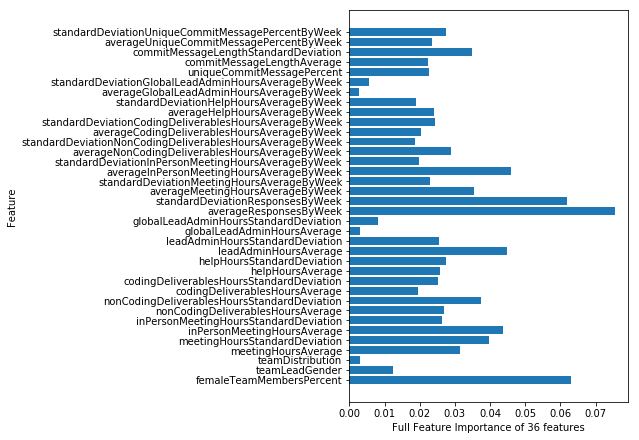

In [121]:
import matplotlib.pyplot as plt
n_features = len(features.columns)
plt.figure(figsize=(5,n_features/5))
plt.barh(range(n_features), rfc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), features.columns)
plt.xlabel('Full Feature Importance of ' + str(n_features) + ' features')
plt.ylabel('Feature')
plt.show()

In [122]:
features.columns[np.argmax(rfc.feature_importances_)] 
print ( "Top important features:")
count = 1
for string in features.columns[rfc.feature_importances_.argsort()[-6:][::-1]] : 
    print(str(count) + '. ' + string )
    count+=1

Top important features:
1. averageResponsesByWeek
2. femaleTeamMembersPercent
3. standardDeviationResponsesByWeek
4. averageInPersonMeetingHoursAverageByWeek
5. leadAdminHoursAverage
6. inPersonMeetingHoursAverage


In [96]:
print("Full dataset test set accuracy")
pandas.crosstab(y_test['productLetterGrade'], rfc.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
#pandas.crosstab(labels['productLetterGrade'], rfc.predict(features), rownames=['Actual'], colnames=['Predicted'])

Full dataset test set accuracy


Predicted,False,True
Actual,,
False,158,52
True,25,254


In [97]:
#Drop certain features
if (full_data): 
    data = pandas.DataFrame.from_csv("data/SETAP PRODUCT DATA/setapProductT1.csv")
    labels = data['productLetterGrade']
    features = data.drop('productLetterGrade', axis=1)
    features = features.drop([col for col in features.columns if 'Total' in col], axis=1)
    features = features.drop([col for col in features.columns if 'Count' in col], axis=1)
    features = features.drop([col for col in features.columns if 'Student' in col], axis=1)
    #features = features.drop('femaleTeamMembersPercent', axis=1)
    # Rename strings in data to appropriate integers, labels to booleans
    mapping = {'F': False, 'A': True}
    features_mapping = {'M': 0, 'F' : 1, 'Global': 0, 'Local': 1}
    features = pandas.DataFrame(features)
    labels = pandas.DataFrame(labels)
    labels = labels.applymap(lambda s: mapping.get(s) if s in mapping else s)
    #features.dropna(axis='columns', how='any', inplace=True)
    features.fillna(1, inplace=True)
    features = features.applymap(lambda s: features_mapping.get(s) if s in features_mapping else s)
    print ('T1 Accuracy score: ' + str(round(rfc.score(features, labels.values.ravel()),3)*100) + '%')
pandas.crosstab(labels['productLetterGrade'], rfc.predict(features), rownames=['Actual'], colnames=['Predicted'])

T1 Accuracy score: 77.0%


Predicted,False,True
Actual,,
False,18,14
True,3,39


In [98]:
data = pandas.DataFrame.from_csv("data/SETAP PRODUCT DATA/setapProductT2.csv")
labels = data['productLetterGrade']
features = data.drop('productLetterGrade', axis=1)
#Drop certain features
if (full_data):
    features = features.drop([col for col in features.columns if 'Total' in col], axis=1)
    features = features.drop([col for col in features.columns if 'Count' in col], axis=1)
    features = features.drop([col for col in features.columns if 'Student' in col], axis=1)
    #features = features.drop('femaleTeamMembersPercent', axis=1)
    # Rename strings in data to appropriate integers, labels to booleans
    mapping = {'F': False, 'A': True}
    features_mapping = {'M': 0, 'F' : 1, 'Global': 0, 'Local': 1}
    features = pandas.DataFrame(features)
    labels = pandas.DataFrame(labels)
    labels = labels.applymap(lambda s: mapping.get(s) if s in mapping else s)
    #features.dropna(axis='columns', how='any', inplace=True)
    features.fillna(1, inplace=True)
    features = features.applymap(lambda s: features_mapping.get(s) if s in features_mapping else s)
    print ('T2 Accuracy score: ' + str(round(rfc.score(features, labels.values.ravel()),3)*100) + '%')
pandas.crosstab(labels['productLetterGrade'], rfc.predict(features), rownames=['Actual'], colnames=['Predicted'])

T2 Accuracy score: 93.2%


Predicted,False,True
Actual,,
False,28,4
True,1,41


In [99]:
data = pandas.DataFrame.from_csv("data/SETAP PRODUCT DATA/setapProductT3.csv")
labels = data['productLetterGrade']
features = data.drop('productLetterGrade', axis=1)
#Drop certain features
if (full_data):
    features = features.drop([col for col in features.columns if 'Total' in col], axis=1)
    features = features.drop([col for col in features.columns if 'Count' in col], axis=1)
    features = features.drop([col for col in features.columns if 'Student' in col], axis=1)
    #features = features.drop('femaleTeamMembersPercent', axis=1)
    # Rename strings in data to appropriate integers, labels to booleans
    mapping = {'F': False, 'A': True}
    features_mapping = {'M': 0, 'F' : 1, 'Global': 0, 'Local': 1}
    features = pandas.DataFrame(features)
    labels = pandas.DataFrame(labels)
    labels = labels.applymap(lambda s: mapping.get(s) if s in mapping else s)
    #features.dropna(axis='columns', how='any', inplace=True)
    features.fillna(1, inplace=True)
    features = features.applymap(lambda s: features_mapping.get(s) if s in features_mapping else s)
    print ('T3 Accuracy score: ' + str(round(rfc.score(features, labels.values.ravel()),3)*100) + '%')
pandas.crosstab(labels['productLetterGrade'], rfc.predict(features), rownames=['Actual'], colnames=['Predicted'])

T3 Accuracy score: 89.2%


Predicted,False,True
Actual,,
False,27,5
True,3,39


In [108]:
data = pandas.DataFrame.from_csv("data/SETAP PRODUCT DATA/setapProductT6.csv")
labels = data['productLetterGrade']
features = data.drop('productLetterGrade', axis=1)
#Drop certain features
if (full_data):
    features = features.drop([col for col in features.columns if 'Total' in col], axis=1)
    features = features.drop([col for col in features.columns if 'Count' in col], axis=1)
    features = features.drop([col for col in features.columns if 'Student' in col], axis=1)
    #features = features.drop('femaleTeamMembersPercent', axis=1)
    # Rename strings in data to appropriate integers, labels to booleans
    mapping = {'F': False, 'A': True}
    features_mapping = {'M': 0, 'F' : 1, 'Global': 0, 'Local': 1}
    features = pandas.DataFrame(features)
    labels = pandas.DataFrame(labels)
    labels = labels.applymap(lambda s: mapping.get(s) if s in mapping else s)
    #features.dropna(axis='columns', how='any', inplace=True)
    features.fillna(1, inplace=True)
    features = features.applymap(lambda s: features_mapping.get(s) if s in features_mapping else s)
    print ('T3 Accuracy score: ' + str(round(rfc.score(features, labels.values.ravel()),3)*100) + '%')
pandas.crosstab(labels['productLetterGrade'], rfc.predict(features), rownames=['Actual'], colnames=['Predicted'])

T3 Accuracy score: 93.2%


Predicted,False,True
Actual,,
False,28,4
True,1,41
